In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from PIL import Image

## Temperature of Cygnus X1 is 31,000 K

#### Assumed a base temperature

In [2]:
size = 500  #size for generating image has nothing to do with Cygnus X1
temperature = 31000
base_temperature = 6500

In [3]:
c = 299792458. * 10**9
h = 6.62607004 * 10**-16
kB = 1.38064852 * 10**-5

In [4]:
λ, x, y, z = np.loadtxt('lin2012xyz2e_fine_7sf.csv', delimiter=',').T

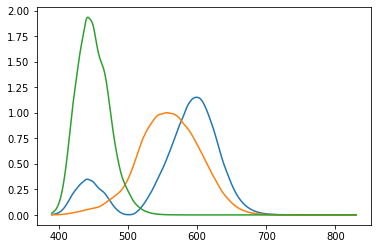

In [5]:
plt.plot(λ, x)
plt.plot(λ, y)
plt.plot(λ, z)

In [6]:
xyz2rgb = np.array([
    [0.41847, -0.15866, -0.082835],
    [-0.091169, 0.25243, 0.015708],
    [0.00092090, -0.0025498, 0.17860]
])

In [7]:
r, g, b = xyz2rgb @ np.array([x, y, z])

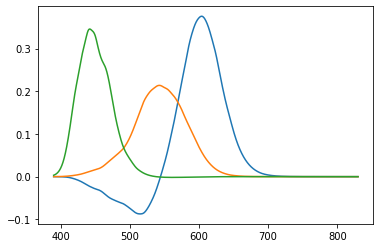

In [8]:
plt.plot(λ, r)
plt.plot(λ, g)
plt.plot(λ, b)

In [9]:
def planck(T, λ):
    return 2.0 * h * c**2 / λ**5 / (np.exp(h * c / (λ * kB * T)) - 1.0)

In [10]:
λ_test = np.linspace(1, 2000, 100)
p_test = planck(5000., λ_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


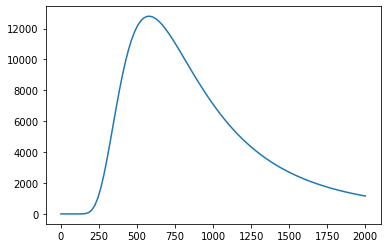

In [11]:
plt.plot(λ_test, p_test)

In [12]:
T = np.linspace(1500, 10000, 300)
I = np.array([planck(t, λ) for t in T])

In [13]:
R = integrate.simps(I * r, λ)
G = integrate.simps(I * g, λ)
B = integrate.simps(I * b, λ)

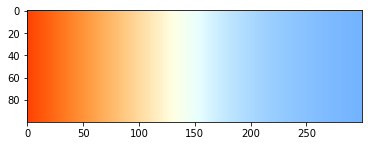

In [14]:
img = np.array([R, G, B]).T
img = np.array([img / np.max(img, axis=1).reshape(-1,1) for i in range(100)])
img[np.isnan(img)] = 0
img[img < 0] = 0
img[img > 1] = 1
plt.imshow(img)

In [15]:
def rel_planck(base_T, base_λ, T, λ):
    return (planck(T, λ) / planck(base_T, λ)) / (planck(T, base_λ) / planck(base_T, base_λ))

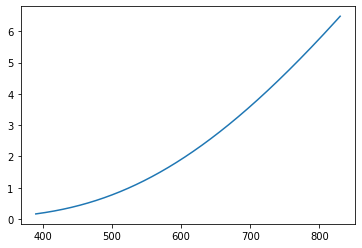

In [16]:
plt.plot(λ, rel_planck(6500., 525., 2900., λ))

In [17]:
I = np.array([rel_planck(6500., 525., t, λ) for t in T])
R = integrate.simps(I * r, λ)
G = integrate.simps(I * g, λ)
B = integrate.simps(I * b, λ)

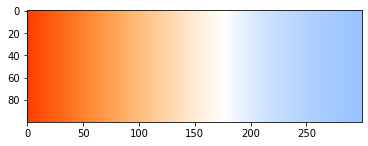

In [18]:
img = np.array([R, G, B]).T
img = np.array([img / np.max(img, axis=1).reshape(-1,1) for i in range(100)])
img[np.isnan(img)] = 0
img[img < 0] = 0
img[img > 1] = 1
plt.imshow(img)

In [19]:
coef = h * c / kB

def opt_planck(T, λ):
    return 1.0 / λ**5 / (np.exp(coef / λ / T) - 1.0)

def opt_rel_planck(base_T, base_λ, T, λ):
    return opt_planck(T, λ) / opt_planck(base_T, λ)

In [20]:
a3_r = np.linspace(0, 1, size)
T = temperature * a3_r**(3/4)

a_R = np.linspace(0, 1, size)
rate = np.sqrt(1.0 - a_R.reshape(-1,1)) / np.sqrt(1.0 - a3_r / 3.0)

In [22]:
rgb = np.array([r, g, b]).T
img = np.empty((size, size, 3), dtype=np.float64)
for i in range(size):
    I = opt_planck(T.reshape(-1,1), rate[i].reshape(-1,1) * λ) / opt_planck(base_temperature, λ)
    img[i,:,:] = integrate.simps(I.reshape(size,-1,1) * rgb.reshape(1,-1,3), λ, axis=1).reshape(-1,3)

img = img / np.max(img, axis=2).reshape(size,size,1)
img[np.isnan(img)] = 0
img[img < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


## Redshift for Cygnus X1

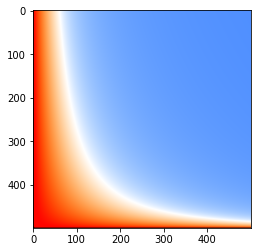

In [23]:
plt.imshow(img)

In [ ]:
Image.fromarray(np.round(img * 255).astype(np.uint8)).save('../Textures/T{}.png'.format(temperature))